In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [449]:
data = pd.read_csv(r'train_LZdllcl.csv')

In [450]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [451]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [452]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [453]:
data.shape

(54808, 14)

In [454]:
data.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


Missing values found in 2 columns:
previous_year_rating which is numerical column and
education which is categorical

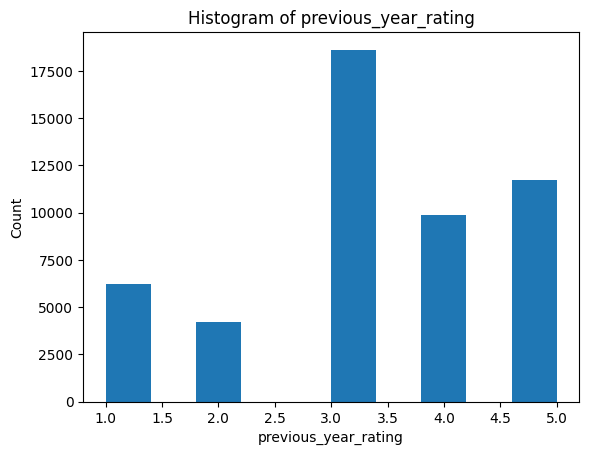

In [455]:
#Checking histogram of previous_year_rating which is a numerical columns
plt.hist(data['previous_year_rating'])
plt.title("Histogram of previous_year_rating")
plt.xlabel("previous_year_rating")
plt.ylabel("Count")
plt.show()

In [456]:
data['previous_year_rating'].skew()

np.float64(-0.3106378431385327)

previous_year_rating is left skewed.So fill missing value with median.

In [457]:
data['previous_year_rating'] = data['previous_year_rating'].fillna(data['previous_year_rating'].median())

In [458]:
data.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [459]:
data['education'].mode()

,education
0,Bachelor's


In [460]:
data['education'] = data['education'].fillna(data['education'].mode()[0])

In [461]:
data.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [462]:
dup_cols = data.columns.duplicated()
dup_cols

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

No duplicate columns.Not removing outliers if any also.

Encoding:

In [463]:
data['department'].nunique()

9

In [464]:
data['department'].value_counts()


,count
department,
Sales & Marketing,16840
Operations,11348
Technology,7138
Procurement,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


In [465]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['department'] = label_encoder.fit_transform(data['department'])

In [466]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,7,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,8,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [467]:
data['region'].value_counts()

,count
region,
region_2,12343
region_22,6428
region_7,4843
region_15,2808
region_13,2648
region_26,2260
region_31,1935
region_4,1703
region_27,1659


In [468]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])

In [469]:
data['education'].value_counts()

,count
education,
Bachelor's,39078
Master's & above,14925
Below Secondary,805


In [470]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['education'] = label_encoder.fit_transform(data['education'])

In [471]:
data['gender'].value_counts()

,count
gender,
m,38496
f,16312


In [472]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

In [473]:
data['recruitment_channel'].value_counts()

,count
recruitment_channel,
other,30446
sourcing,23220
referred,1142


In [474]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['recruitment_channel'] = label_encoder.fit_transform(data['recruitment_channel'])

In [475]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int64  
 2   region                54808 non-null  int64  
 3   education             54808 non-null  int64  
 4   gender                54808 non-null  int64  
 5   recruitment_channel   54808 non-null  int64  
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.9 MB


In [476]:
data.corr()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005187,-0.003423,0.002124,-0.001542,0.005960,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
department,-0.005187,1.000000,-0.020592,0.043441,-0.030108,0.004732,0.014152,0.079162,-0.135561,0.059060,-0.088209,-0.002151,-0.251626,0.000130
region,-0.003423,-0.020592,1.000000,-0.003815,0.019730,-0.000920,-0.004590,-0.088918,-0.005977,-0.058939,-0.007664,0.000307,0.023572,0.008841
education,0.002124,0.043441,-0.003815,1.000000,-0.032368,-0.003564,-0.033469,0.339966,0.027393,0.233666,0.012123,-0.001409,0.032787,0.029257
gender,-0.001542,-0.030108,0.019730,-0.032368,1.000000,0.006567,0.084501,-0.016293,-0.024024,-0.019675,-0.037400,0.002381,-0.024494,-0.011109
recruitment_channel,0.005960,0.004732,-0.000920,-0.003564,0.006567,1.000000,-0.010405,-0.011400,0.005731,-0.002887,-0.000297,-0.005510,-0.002416,0.002229
no_of_trainings,-0.005121,0.014152,-0.004590,-0.033469,0.084501,-0.010405,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,0.079162,-0.088918,0.339966,-0.016293,-0.011400,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.135561,-0.005977,0.027393,-0.024024,0.005731,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,0.059060,-0.058939,0.233666,-0.019675,-0.002887,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670


No 2 rows are correlated. So not dropping any columns

In [477]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [478]:
data['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


91 percent is not promoted and 9 percent is promoted.
so there is data imbalance.we can do upsampling

In [479]:
from imblearn.over_sampling import RandomOverSampler
x = data.drop('is_promoted',axis = 1)
y = data['is_promoted']

In [480]:
oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)

In [481]:
balanced_data = pd.DataFrame(x_resampled, columns = x.columns)

In [482]:
balanced_data['is_promoted'] = y_resampled

In [483]:
balanced_data['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,50140


In [484]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


Scaling: StandardScaling:

In [485]:
x=data.drop(['employee_id','is_promoted'],axis =1)
y=data['is_promoted']

In [486]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x1 = std_scaler.fit_transform(x)
type(x1)

numpy.ndarray

In [487]:
x1 = pd.DataFrame(x1)
type(x1)

pandas.core.frame.DataFrame

In [488]:
x1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.808933,1.776526,1.619758,-1.536223,1.154111,-0.415276,0.025598,1.395766,0.500460,1.356878,-0.154018,-1.075931
1,-0.388183,-0.163034,-0.628838,0.650947,-0.885239,-0.415276,-0.627135,1.395766,-0.437395,-0.736986,-0.154018,-0.253282
2,0.808933,-0.619401,-0.628838,0.650947,1.154111,-0.415276,-0.104948,-0.250651,0.265996,-0.736986,-0.154018,-1.001145
3,0.808933,-0.048942,-0.628838,0.650947,-0.885239,1.226063,0.547785,-1.897069,0.969387,-0.736986,-0.154018,-1.001145
4,1.207972,0.293333,-0.628838,0.650947,-0.885239,-0.415276,1.331064,-0.250651,-0.906322,-0.736986,-0.154018,0.718939


I am not going to use x1 scaled dataframe. I will use data itself for ML algorithms.For supervised classification problems,these algorithms can be used:Naive Bayes Classifier Algorithm,SVM,Decision Tree,k_NN,Random Forest

In [489]:
data2 = pd.read_csv(r'test_2umaH9m.csv')

In [490]:
data2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [491]:
data2.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [492]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [493]:
data2.shape

(23490, 13)

In [494]:
data2.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [495]:
data2['education'].mode()
data2['education'] = data2['education'].fillna(data2['education'].mode()[0])
data2.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [496]:
data2['department'].nunique()


9

In [497]:
data2['department'].value_counts()

,count
department,
Sales & Marketing,7315
Operations,4764
Procurement,3020
Technology,3011
Analytics,2319
Finance,1091
HR,1085
Legal,445
R&D,440


In [498]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data2['department'] = label_encoder.fit_transform(data2['department'])

In [499]:
data2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,2,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,7,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,5,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,1,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [500]:
data2['region'].value_counts()

,count
region,
region_2,5299
region_22,2739
region_7,1982
region_13,1167
region_15,1130
region_26,1011
region_31,844
region_4,775
region_27,710


In [501]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data2['region'] = label_encoder.fit_transform(data2['region'])

In [502]:
data2['education'].value_counts()

,count
education,
Bachelor's,16612
Master's & above,6504
Below Secondary,374


In [503]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data2['education'] = label_encoder.fit_transform(data2['education'])

In [504]:
data2['gender'].value_counts()

,count
gender,
m,16596
f,6894


In [505]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data2['gender'] = label_encoder.fit_transform(data2['gender'])

In [506]:
data2['recruitment_channel'].value_counts()


,count
recruitment_channel,
other,13078
sourcing,9961
referred,451


In [507]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data2['recruitment_channel'] = label_encoder.fit_transform(data2['recruitment_channel'])

In [508]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  int64  
 2   region                23490 non-null  int64  
 3   education             23490 non-null  int64  
 4   gender                23490 non-null  int64  
 5   recruitment_channel   23490 non-null  int64  
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.3 MB


In [509]:
data2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,NaN,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


In [510]:
data2['is_promoted'] = 0
data2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,8,18,0,1,2,1,24,NaN,1,1,0,77,0
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51,0
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47,0
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65,0
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61,0


In [511]:
data2.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [512]:
data2['previous_year_rating'].skew()


np.float64(-0.32470789207738204)

In [513]:
data2['previous_year_rating'] = data2['previous_year_rating'].fillna(data2['previous_year_rating'].median())


In [514]:
data2.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [515]:
x_train = data.drop(['employee_id','is_promoted'],axis =1)
y_train = data['is_promoted']
x_test = data2.drop(['employee_id','is_promoted'],axis =1)
y_test = data2['is_promoted']

Naive Bayes Classifier:

In [516]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
nb_classifier = GaussianNB()
model = nb_classifier.fit(x_train,y_train)
y_preds = model.predict(x_test)
nb_f1 =f1_score(y_test,y_preds)
nb_f1

0.0

SVM:

In [517]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
svm_cls = SVC(kernel = 'rbf')
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)
svm_f1 =f1_score(y_test,y_pred_svm)
svm_f1


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

Decision Tree:

In [518]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train,y_train)
y_pred_dt = dt_cls.predict(x_test)
dcn_f1 =f1_score(y_test,y_pred_dt)
dcn_f1

0.0

Random Forest:

In [519]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)
rf_f1 = f1_score(y_test,y_pred_rf)
rf_f1

0.0

In [527]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     23490
           1       0.00      0.00      0.00         0

    accuracy                           0.97     23490
   macro avg       0.50      0.49      0.49     23490
weighted avg       1.00      0.97      0.99     23490

[[22830   660]
 [    0     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN:

In [520]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    knn.fit(x_train,y_train)
    y_predictions = knn.predict(x_test)
    f1_score(y_test,y_predictions)
    metric_k.append(f1_score(y_test,y_predictions))

In [521]:
metric_k

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

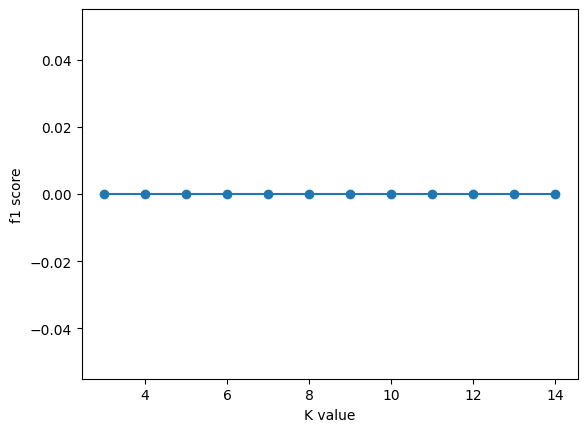

In [522]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('f1 score')
plt.show()

Highest value is for k =2

In [523]:
  knn = KNeighborsClassifier(n_neighbors = 2,metric = 'euclidean')
  knn.fit(x_train,y_train)
  y_predictions = knn.predict(x_test)
  knn_f1 = f1_score(y_test,y_predictions)
  knn_f1

0.0

In [524]:
print('f1-score of KNN:',knn_f1)
print('f1-score of RandomForestClassifier:',rf_f1)
print('f1-score of DecisionTreeClassifier:',dcn_f1)
print('f1-score of SVM:',svm_f1)
print('f1-score of Naive Bayes Classifier:',nb_f1)


f1-score of KNN: 0.0
f1-score of RandomForestClassifier: 0.0
f1-score of DecisionTreeClassifier: 0.0
f1-score of SVM: 0.0
f1-score of Naive Bayes Classifier: 0.0


When I am using train and test from 2 files, I am getting f1-score of all as 0 .Highest f1-score is for RandomForestClassifier when I split the train dataset into train and test. So i am choosing it as the best algorithm for this dataset.

In [525]:

y_pred_rf

array([0, 0, 0, ..., 0, 0, 1])

In [526]:
data2['is_promoted'] = y_pred_rf
data3 = data2[['employee_id','is_promoted']]
data3.to_csv("output_with_predictions.csv", index=False)

In [529]:
data4 = pd.read_csv(r'output_with_predictions.csv')

In [531]:
data4['is_promoted'].value_counts()

,count
is_promoted,
0,22830
1,660
